In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from KC_methods import calc_KC76
from logistic_maps import logistic_map, to_bin,discretize
import random

In [17]:
SAMPLES = 10**6

def generate_patterns(iterations,epsilon=0,e_freq=0,r=-1,r_range=None):

    '''Return list of patterns  from random `r` and `x_0`. patterns are of length `iterations`
        If r parameter is provided it will use that as the initial value of r, otherwise it will be random.
    
    '''
    r_is_random = r == -1

    patterns = [''] *(SAMPLES) 
    for i in range(SAMPLES):
        if (r_is_random):
            r = np.random.uniform(0,4)
        if r_range is not None:
            r = np.random.uniform(*r_range)
        x_0 = np.random.rand()
        mapp = logistic_map(x_0,r,iterations,epsilon=epsilon,e_freq=e_freq)
        patterns[i] = to_bin(discretize(mapp))
    return patterns

def generate_logistic(iterations,start_iteration=0,epsilon=0,e_frequency=0,r=-1,r_range=None):
    ''' Wrapper function for logicstic map generation with kick.

    Parameters:
        `iterations`: the number of iterations that will be taken into account, this will determine the length of the pattern.
        `start_iteration`: after what iteration to start observing the pattern. defaults to `0`.
        `epsilon`: The magnitude of the random kick applied, when 0.5 is passed, the kick will be between -0.5,0.5. default to 0
        `e_frequency`: Nonnegative number determining the frequency of the kick. defaults to 0.
                       If the number is in the range [0,1), this is a probability.
    '''
                       # Otherwise it represents the frequency of the kick (1 means every time, 2 means every two time [nokick,kick,nokick,kick]) NOT IMPLEMENTED
    patterns = generate_patterns(start_iteration+iterations,epsilon=epsilon,e_freq=e_frequency,r=r,r_range=r_range)
    patterns = [ pattern[start_iteration:] for pattern in patterns]
    return patterns

In [22]:
kcs = []

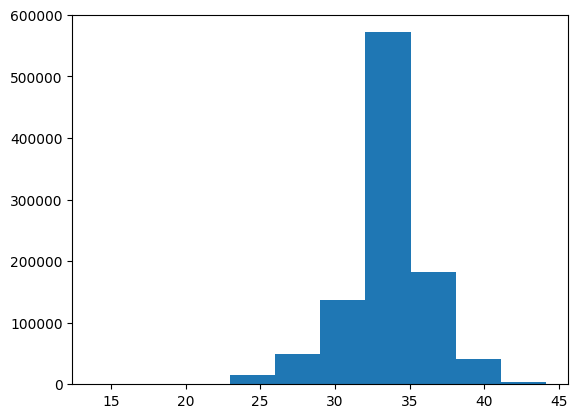

In [26]:
for r_range in [[0,4],[3,4],[3.57,4],[4,4]]:
    patterns = generate_logistic(25,0,0,0,-1,r_range=r_range)
    complexities = [calc_KC76(x) for x in patterns]
    plt.clf()
    plt.hist(complexities)
    plt.savefig(f"results/histograms/hist_{r_range[0]}_to_{r_range[1]}.jpg")